In [81]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [82]:
import pyspark
from pyspark.sql import SparkSession
spark=SparkSession.builder.appName("HORS").getOrCreate()

In [83]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [84]:
df=spark.read.csv("/content/drive/MyDrive/spark_projects/train.csv",header=True,inferSchema=True)

In [85]:
df.show(10)

+---+-----+--------------------+
| id|label|               tweet|
+---+-----+--------------------+
|  1|    0| @user when a fat...|
|  2|    0|@user @user thank...|
|  3|    0|  bihday your maj...|
|  4|    0|#model   i love u...|
|  5|    0| factsguide: soci...|
|  6|    0|[2/2] huge fan fa...|
|  7|    0| @user camping to...|
|  8|    0|the next school y...|
|  9|    0|we won!!! love th...|
| 10|    0| @user @user welc...|
+---+-----+--------------------+
only showing top 10 rows



0 -> Ham;
1 -> Spam;

In [86]:
df.printSchema()

root
 |-- id: integer (nullable = true)
 |-- label: integer (nullable = true)
 |-- tweet: string (nullable = true)



In [87]:
df=df.drop("id")

In [88]:
df.groupBy("label").count().show()

+-----+-----+
|label|count|
+-----+-----+
|    1| 2242|
|    0|29720|
+-----+-----+



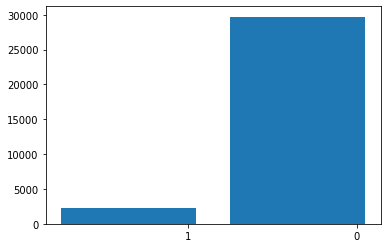

In [101]:
from matplotlib import pyplot 
l = [(  '1',    2242)
     ,('0'         ,   29720)
     ]
df = spark.createDataFrame(l,['word','count'])
#Add values to a list (not recommend when you have a huge dataframe)
bla = df.collect()
#create a numeric value for every label
indexes = list(range(len(bla)))

#split words and counts to different lists 
values = [r['count'] for r in bla]
labels = [r['word'] for r in bla]

#Plotting
bar_width = 0.35

pyplot.bar(indexes, values)

#add labels
labelidx = [i + bar_width for i in indexes] 
pyplot.xticks(labelidx, labels)
pyplot.show()


In [102]:
df.show(10)

+----+-----+
|word|count|
+----+-----+
|   1| 2242|
|   0|29720|
+----+-----+



In [103]:
df2=spark.read.csv("/content/drive/MyDrive/spark_projects/labeled_data.csv",header=True,inferSchema=True)

In [104]:
df2.show()

+------+-----+-----------+------------------+-------+-----+--------------------+
|   _c0|count|hate_speech|offensive_language|neither|class|               tweet|
+------+-----+-----------+------------------+-------+-----+--------------------+
|     0|    3|          0|                 0|      3|    2|!!! RT @mayasolov...|
|     1|    3|          0|                 3|      0|    1|!!!!! RT @mleew17...|
|     2|    3|          0|                 3|      0|    1|!!!!!!! RT @UrKin...|
|     3|    3|          0|                 2|      1|    1|!!!!!!!!! RT @C_G...|
|     4|    6|          0|                 6|      0|    1|!!!!!!!!!!!!! RT ...|
|     5|    3|          1|                 2|      0|    1|"!!!!!!!!!!!!!!!!...|
|     6|    3|          0|                 3|      0|    1|"!!!!!!""@__Brigh...|
|     7|    3|          0|                 3|      0|    1|!!!!&#8220;@selfi...|
|     8|    3|          0|                 3|      0|    1|""" &amp; you mig...|
|     9|    3|          1|  

In [105]:
df2.groupBy("class").count().show()

+-----+-----+
|class|count|
+-----+-----+
| null| 1619|
|    1|19190|
|    2| 4163|
|    0| 1430|
+-----+-----+



In [106]:
df2=df2.filter("class==1")

In [107]:
df2.show()

+---+-----+-----------+------------------+-------+-----+--------------------+
|_c0|count|hate_speech|offensive_language|neither|class|               tweet|
+---+-----+-----------+------------------+-------+-----+--------------------+
|  1|    3|          0|                 3|      0|    1|!!!!! RT @mleew17...|
|  2|    3|          0|                 3|      0|    1|!!!!!!! RT @UrKin...|
|  3|    3|          0|                 2|      1|    1|!!!!!!!!! RT @C_G...|
|  4|    6|          0|                 6|      0|    1|!!!!!!!!!!!!! RT ...|
|  5|    3|          1|                 2|      0|    1|"!!!!!!!!!!!!!!!!...|
|  6|    3|          0|                 3|      0|    1|"!!!!!!""@__Brigh...|
|  7|    3|          0|                 3|      0|    1|!!!!&#8220;@selfi...|
|  8|    3|          0|                 3|      0|    1|""" &amp; you mig...|
|  9|    3|          1|                 2|      0|    1|""" @rhythmixx_ :...|
| 10|    3|          0|                 3|      0|    1|""" Keek

In [108]:
df2.groupBy("class").count().show()

+-----+-----+
|class|count|
+-----+-----+
|    1|19190|
+-----+-----+



In [109]:
df2 = df2.select(["class","tweet"])
df2=df2.withColumnRenamed("class", "label")
df2.show()

+-----+--------------------+
|label|               tweet|
+-----+--------------------+
|    1|!!!!! RT @mleew17...|
|    1|!!!!!!! RT @UrKin...|
|    1|!!!!!!!!! RT @C_G...|
|    1|!!!!!!!!!!!!! RT ...|
|    1|"!!!!!!!!!!!!!!!!...|
|    1|"!!!!!!""@__Brigh...|
|    1|!!!!&#8220;@selfi...|
|    1|""" &amp; you mig...|
|    1|""" @rhythmixx_ :...|
|    1|""" Keeks is a bi...|
|    1|""" Murda Gang bi...|
|    1|""" So hoes that ...|
|    1|""" bad bitches i...|
|    1|""" bitch get up ...|
|    1|""" bitch nigga m...|
|    1|""" bitch plz wha...|
|    1|""" bitch who do ...|
|    1|""" bitches get c...|
|    1|""" black bottle ...|
|    1|""" broke bitch c...|
+-----+--------------------+
only showing top 20 rows



In [110]:
data = df.union(df2)
data.show()

+----+--------------------+
|word|               count|
+----+--------------------+
|   1|                2242|
|   0|               29720|
|   1|!!!!! RT @mleew17...|
|   1|!!!!!!! RT @UrKin...|
|   1|!!!!!!!!! RT @C_G...|
|   1|!!!!!!!!!!!!! RT ...|
|   1|"!!!!!!!!!!!!!!!!...|
|   1|"!!!!!!""@__Brigh...|
|   1|!!!!&#8220;@selfi...|
|   1|""" &amp; you mig...|
|   1|""" @rhythmixx_ :...|
|   1|""" Keeks is a bi...|
|   1|""" Murda Gang bi...|
|   1|""" So hoes that ...|
|   1|""" bad bitches i...|
|   1|""" bitch get up ...|
|   1|""" bitch nigga m...|
|   1|""" bitch plz wha...|
|   1|""" bitch who do ...|
|   1|""" bitches get c...|
+----+--------------------+
only showing top 20 rows



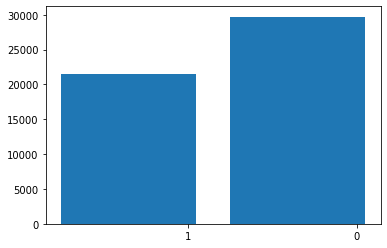

In [114]:
from matplotlib import pyplot 
l = [(  '1',    21432)
     ,('0'         ,   29720)
     ]
df = spark.createDataFrame(l,['word','count'])
#Add values to a list (not recommend when you have a huge dataframe)
bla = df.collect()
#create a numeric value for every label
indexes = list(range(len(bla)))

#split words and counts to different lists 
values = [r['count'] for r in bla]
labels = [r['word'] for r in bla]

#Plotting
bar_width = 0.35

pyplot.bar(indexes, values)

#add labels
labelidx = [i + bar_width for i in indexes] 
pyplot.xticks(labelidx, labels)
pyplot.show()

In [115]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import HashingTF, IDF, Tokenizer

In [116]:
tokenizer = Tokenizer(inputCol="tweet", outputCol="words")
wordsData = tokenizer.transform(data)
wordsData.show(truncate=False)

IllegalArgumentException: ignored

Tf*Idf do not convert directly raw data into useful features. Firstly, it converts raw strings or dataset into vectors and each word has its own vector. Then we’ll use a particular technique for retrieving the feature like Cosine Similarity which works on vectors, etc.

In [117]:

hashingTF = HashingTF(inputCol="words", outputCol="rawFeatures")
featurizedData = hashingTF.transform(wordsData)

idf = IDF(inputCol="rawFeatures", outputCol="features")
idfModel = idf.fit(featurizedData)
rescaledData = idfModel.transform(featurizedData)

rescaledData.show(truncate=False)

+-----+-----------------------------------------------------------------------------------------------------------------------------------------------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [118]:
from pyspark.sql.functions import col
df = rescaledData.select(col("features"),col("label"),col("tweet"))
df.show(truncate=False)

+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-----+-----------------------------------------------------------------------------------------------------------------------------------------------+
|features                                                                                                                                                                                                                                                                                                                                       

In [119]:
train,test=df.randomSplit([0.8, 0.2])
train.show()

+--------------------+-----+--------------------+
|            features|label|               tweet|
+--------------------+-----+--------------------+
|(262144,[2,11879,...|    0| @user and by pat...|
|(262144,[2,19036,...|    0|*sighs sadly* i m...|
|(262144,[10,8254,...|    1|@user #netanyahu ...|
|(262144,[17,27607...|    0|what a day!  #nut...|
|(262144,[17,93846...|    0|ð°ðâðð...|
|(262144,[19,11879...|    1|@user hey @user -...|
|(262144,[20,1377,...|    0| @user my beautif...|
|(262144,[20,2306,...|    0|missing our day t...|
|(262144,[20,5415,...|    0|  #national  #bes...|
|(262144,[20,11879...|    0|oh stop @user #14...|
|(262144,[20,11879...|    0|lozza ð¹ð¦â...|
|(262144,[20,11879...|    0| @user lozza ð¹...|
|(262144,[20,13781...|    0|my girl ðð ...|
|(262144,[20,19036...|    0|my life has been ...|
|(262144,[20,20820...|    0|. . with maiâ¤ ....|
|(262144,[20,24980...|    0|when you're with ...|
|(262144,[20,31579...|    0|with the gorgeous...|


In [120]:
from pyspark.ml.classification import LogisticRegression

In [121]:
model=LogisticRegression(labelCol='label')
model=model.fit(train) 
summary=model.summary.predictions.describe().show()

+-------+------------------+--------------------+------------------+
|summary|             label|               tweet|        prediction|
+-------+------------------+--------------------+------------------+
|  count|             41060|               41060|             41060|
|   mean|0.4168533852898198|                null|0.4168533852898198|
| stddev|0.4930441774172516|                null|0.4930441774172516|
|    min|               0.0|    #friday #beat...|               0.0|
|    max|               1.0|ó¾­© duchess ó¾...|               1.0|
+-------+------------------+--------------------+------------------+



In [122]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

In [123]:
ev=BinaryClassificationEvaluator()

In [124]:
pr=model.transform(test)

In [125]:
ev.evaluate(pr)

0.9637008039081536

In [126]:
prediction=model.evaluate(test)
lol=prediction.predictions

In [127]:
lol.show(truncate=False)

+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-----+-----------------------------------------------------------------------------------------------------------------------------------------+----------------------------------------+------------------------------------------+----------+
|features                                                                                            

In [131]:
lol = lol.select(col("tweet"),col("probability"),col("prediction"))
lol.show()

+--------------------+--------------------+----------+
|               tweet|         probability|prediction|
+--------------------+--------------------+----------+
|  youth day...we ...|           [1.0,0.0]|       0.0|
|weekend away with...|           [1.0,0.0]|       0.0|
|  bihday to my #b...|           [1.0,0.0]|       0.0|
| @user i think me...|[0.99999999999991...|       0.0|
|i think me and th...|[2.19110556939152...|       1.0|
|happy b'day my tw...|           [1.0,0.0]|       0.0|
|"as what sakura k...|           [1.0,0.0]|       0.0|
|are you    or  ar...|           [1.0,0.0]|       0.0|
|"as a student in ...|           [1.0,0.0]|       0.0|
|clearly communica...|           [1.0,0.0]|       0.0|
|first ocean dive ...|           [1.0,0.0]|       0.0|
|all my friends ar...|           [1.0,0.0]|       0.0|
|we're sharing a b...|           [1.0,0.0]|       0.0|
|congrats guys! @u...|           [1.0,0.0]|       0.0|
|good news guys! i...|           [1.0,0.0]|       0.0|
| @user #w